# Project By: Princilla Abena Koranteng

# PREDICTION OF CANCER TYPE USING PATIENT GENE EXPRESSION

# PROBLEM STATEMENT 

Cancer has become one of the major factors responsible for global deaths, due to late diagnoses and lack of proper treatment. It involves the abnormal and uncontrolled growth of cells inside the body, which might spread from one place to different parts. Ribonucleic acid (RNA) sequencing can detect the changes occurring inside cells and helps to analyze the transcriptome of gene expression patterns inside RNA. Machine learning techniques can assist in the prediction of cancer at an early stage, if data is available. 

## Objectives
The objective for this project is to build models and classify the different cancer types using RNA-seq gene expression data.

For this purpose we implemented supervised models to classify the samples collected using the labels and compare the performance of the respective models.

## Data Description
The dataset was collected from UCI Machine Learning Repository. The rows represent the observations gene expressions of patients having different types of tumors (cancer types). The last column contains the cancer types as listed below:
- BRCA for Breast Cancer
- KIRC for Renal Cancer (Kidney Renal Clear Cell Carcinoma)
- LUAD for Lung Cancer (Lung adenocarcinoma)
- PRAD for Prostate Cancer (Prostate adenocarcinoma)
- COAD fro Colon adenocarcinoma



## Machine Learning Workflow
[1. Import Python Libraries](#Import-Python-libraries)

[2. Importing data](#Importing-data)

[3. Data Exploration & Cleaning](#Data-Exploration-&-Cleaning)

[4. Data Preprocesing](#Data-preprocesing)

[5. Building & Evaluation of Model](#Building-the-model)

   * [-KNeighbours Classifier](#KNeighborsClassifier)
   
   * [-Logistic Regression](#Logistic-Regression)
   
   * [-SGDClassifier](#SGDClassifier)
   * [-RandomForest Classifier](#RandomForestClassifier)
   * [-Decision Tree Classifier](#Decision-Tree-Classifier)
   * [-Voting Classifier](#VotingClassifier)  
   * [-XGBoost](#XGBoost)
   * [-BaggingClassifier](#BaggingClassifier)
   * [-AdaBoostClassifier](#AdaBoostClassifier)
    
[6. Result](#RESULT)   

## Import Python libraries

In [15]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import StandardScaler

#classification
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import f1_score,precision_score, recall_score,make_scorer
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score

#Pipeline
from sklearn.pipeline import Pipeline

#Model Selection
from sklearn.model_selection import RandomizedSearchCV

# Decomposition
from sklearn.decomposition import PCA

ModuleNotFoundError: No module named 'yellowbrick'

In [24]:
# yellowbrick installation
!pip install yellowbrick

In [25]:
from yellowbrick.classifier import ROCAUC

## Importing data

In [2]:

#Importing data 

cancer_data = pd.read_csv('cancer_gene_expression.csv')
cancer_data.head(3)


,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,gene_10,...,gene_7992,gene_7993,gene_7994,gene_7995,gene_7996,gene_7997,gene_7998,gene_7999,gene_8000,Cancer_Type
0,0.0,0.0,0.0,2.088413,0.0,0.0,0.0,0.0,0.550605,2.815760,...,11.558803,8.881802,6.014840,6.643534,11.740624,7.065012,9.932659,6.928584,2.088413,KIRC
1,0.0,0.0,0.0,3.205955,0.0,0.0,0.0,0.0,0.425244,2.354396,...,11.062829,9.032864,5.054193,6.432320,12.104985,7.300746,9.872796,5.039231,2.448002,KIRC
2,0.0,0.0,0.0,4.746646,0.0,0.0,0.0,0.0,2.639417,1.657091,...,12.497640,7.198160,0.943434,7.371690,11.202356,8.426588,11.176890,3.119738,4.433988,BRCA



## Data Exploration & Cleaning




In [3]:
#let's check the number of samples and features
#note:the last column contain the labels. it is not considered as a feature

cancer_data.shape

(801, 8001)

In [4]:
#check for missing values
datanul=cancer_data.isnull().sum()
g=[i for i in datanul if i>0]

print('columns with missing values:%d'%len(g))

columns with missing values:0


Text(0.5, 0, 'Standard Deviation')

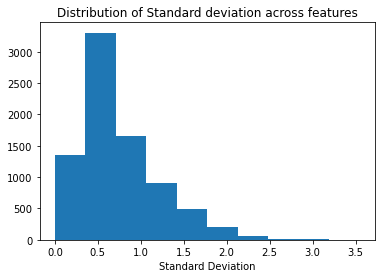

In [5]:
plt.hist(cancer_data.iloc[:,:-1].std())
plt.title('Distribution of Standard deviation across features')
plt.xlabel('Standard Deviation')

Text(0.5, 0, 'Mean')

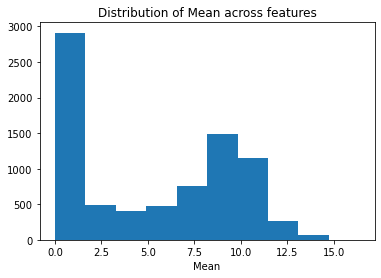

In [6]:
plt.hist(cancer_data.iloc[:,:-1].mean())
plt.title('Distribution of Mean across features')
plt.xlabel('Mean')

 Based on the graphs above it is noted that although most of the columns have their mean around 0, the standard deviation of the various columns are around 0.5.
 SInce it is required the standard deviation be 1 for normally distributed data, it is concluded that the data needs to be preprocessed with a scaler before building of models. This will normalize the data and improve effectiveness of the models

In [7]:
#checking the counts of the different cancer types that are in the data

print(cancer_data['Cancer_Type'].value_counts())

BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: Cancer_Type, dtype: int64


 It is noted that there are 5 classes/cancer types. Although the count of BRCA is quite high, it doesn't indicate imbalance that will throw of the effectiveness of the machine learning models

<AxesSubplot:>

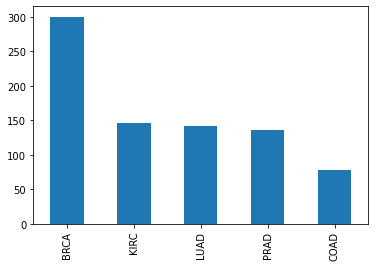

In [8]:
#plot a bar chat to display the class distribution

cancer_data['Cancer_Type'].value_counts().plot.bar()

# Project By: Princilla Abena Koranteng

 
## **Data preprocesing** 
The data is first separated into features and a target variable after which the classes are encoded as numeric type


In [9]:
# 1. Separating data into features (X) and the target (y)
X = cancer_data.drop(['Cancer_Type'], axis =1)
y = cancer_data['Cancer_Type']

print('X')
print(X.head(1))
print()
print('y')
print(y.head())

X
   gene_1  gene_2  gene_3    gene_4  gene_5  gene_6  gene_7  gene_8    gene_9  \
0     0.0     0.0     0.0  2.088413     0.0     0.0     0.0     0.0  0.550605   

   gene_10  ...  gene_7991  gene_7992  gene_7993  gene_7994  gene_7995  \
0  2.81576  ...   6.883022  11.558803   8.881802    6.01484   6.643534   

   gene_7996  gene_7997  gene_7998  gene_7999  gene_8000  
0  11.740624   7.065012   9.932659   6.928584   2.088413  

[1 rows x 8000 columns]

y
0    KIRC
1    KIRC
2    BRCA
3    KIRC
4    COAD
Name: Cancer_Type, dtype: object


\
**Encode labels**

The labels for this data are categorical and we therefore have to convert them to numeric forms. This is referred to as encoding. Machine learning models usually require input data to be in numeric forms, hence we encoding the labels.

In [10]:
#let's encode target labels (y) with values between 0 and n_classes-1.
#encoding will be done using the LabelEncoder
label_encoder=LabelEncoder()
label_encoder.fit(y)
y_encoded=label_encoder.transform(y)
labels=label_encoder.classes_
classes=np.unique(y_encoded)

In [11]:
labels

array(['BRCA', 'COAD', 'KIRC', 'LUAD', 'PRAD'], dtype=object)

In [12]:
classes

array([0, 1, 2, 3, 4])

\
**Data Splitting**\
The data will now split into training and test subsets.
The training data is initially passed to the machine learning model during fitting. This is to enable the model to identify patterns which can be used to make future predictions.
The testing data is used to evaluate the model after the training phase.

In [13]:
#split data into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y_encoded,test_size=0.2,random_state = 42)

In [14]:
# Defining function that will run models since a similar process will be done for almost all models
def runmodel(model,tuning_params,scorer=make_scorer(f1_score,average='weighted'),n_iter=20):
    pca=PCA(random_state=0)
    sc=StandardScaler()
    pipe=Pipeline(steps=[('sc',sc),('pca',pca),('model',model)])
    r_search=RandomizedSearchCV(pipe,tuning_params,n_jobs=-1,verbose=-1,scoring=scorer,cv=4,n_iter=n_iter,random_state=2)
    r_search.fit(X_train,y_train)
    print(r_search.best_estimator_.get_params())
    print(classification_report(y_test,r_search.predict(X_test)))

In [82]:
# Defining a function for plotting ROC Curves for the various classifiers
def plot_roc(model):
    features=list(range(27))
    plotter=ROCAUC(model,micro=False,classes=['BRCA','COAD','KIRC','LUAD','PRAD'])
    plotter.fit(X_train.values,y_train)
    plotter.score(X_test.values,y_test)
    plotter.show()

### Building the model

## KNeighborsClassifier

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()
tuning_params=dict(model__n_neighbors=list(range(3,13)),pca__n_components=list(range(300)))

In [18]:
runmodel(model,tuning_params,n_iter=30)

{'memory': None, 'steps': [('sc', StandardScaler()), ('pca', PCA(n_components=27, random_state=0)), ('model', KNeighborsClassifier(n_neighbors=12))], 'verbose': False, 'sc': StandardScaler(), 'pca': PCA(n_components=27, random_state=0), 'model': KNeighborsClassifier(n_neighbors=12), 'sc__copy': True, 'sc__with_mean': True, 'sc__with_std': True, 'pca__copy': True, 'pca__iterated_power': 'auto', 'pca__n_components': 27, 'pca__random_state': 0, 'pca__svd_solver': 'auto', 'pca__tol': 0.0, 'pca__whiten': False, 'model__algorithm': 'auto', 'model__leaf_size': 30, 'model__metric': 'minkowski', 'model__metric_params': None, 'model__n_jobs': None, 'model__n_neighbors': 12, 'model__p': 2, 'model__weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        60
           1       1.00      0.94      0.97        16
           2       1.00      1.00      1.00        28
           3       0.96      0.92      0.94        24
           4

In [77]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
knn=KNeighborsClassifier(n_neighbors=12)
pca=PCA(n_components=27,random_state=0)
sc=StandardScaler()
knnpipe=Pipeline(steps=[('sc',sc),('pca',pca),('knn',knn)])

In [78]:
knnpipe.fit(X_train.values,y_train)
knnf1=f1_score(y_test,knnpipe.predict(X_test.values),average='weighted')
knnf1

0.9750363300142004

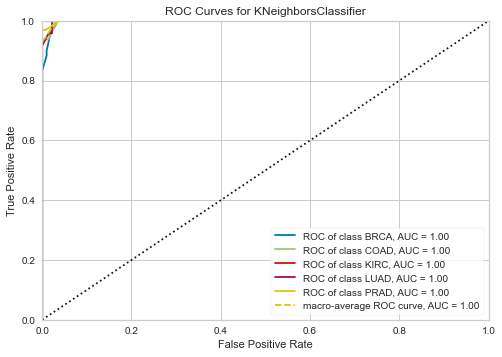

In [83]:
plot_roc(knnpipe)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(random_state=7,n_jobs=-1,multi_class='multinomial', max_iter=1000,penalty='l2')
tuning_params=dict(model__solver=['newton-cg','sag','saga','lbfgs'],
                   pca__n_components=list(range(300)))

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
logreg=LogisticRegression(random_state=7,n_jobs=-1,multi_class='multinomial',penalty='l2',solver='sag', max_iter=1000)
pca=PCA(n_components=149,random_state=0)
sc=StandardScaler()
logregpipe=Pipeline(steps=[('sc',sc),('pca',pca),('logreg',logreg)])

In [ ]:
logregpipe.fit(X_train.values,y_train)
lrf1=f1_score(y_test,logregpipe.predict(X_test.values),average='weighted')
lrf1

In [ ]:
plot_roc(logregpipe)

### SGDClassifier

In [ ]:
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(n_jobs=-1,random_state=20,average=True)
tuning_params=dict(pca__n_components=list(range(3,300,1)),model__loss=['hinge','squared_hinge','perceptron'],
                model__alpha=np.logspace(0.001,10))

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
sgd=SGDClassifier(random_state=7,n_jobs=-1,alpha=68.79407260342448,loss='hinge',average=True)
pca=PCA(n_components=154,random_state=0)
sc=StandardScaler()
sgdpipe=Pipeline(steps=[('sc',sc),('pca',pca),('sgd',sgd)])

In [ ]:
sgdpipe.fit(X_train.values,y_train)
sgdf1=f1_score(y_test,sgdpipe.predict(X_test.values),average='weighted')
sgdf1

In [ ]:
plot_roc(sgdpipe)

### RandomForestClassifier

In [ ]:
model=RandomForestClassifier(n_jobs=-1,random_state=20,verbose=1)
tuning_params=dict(pca__n_components=list(range(3,300,1)),model__n_estimators=[50,70,90,110],
                model__criterion=['gini','entropy'],model__max_depth=[2,4,6,8])

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
rforest=RandomForestClassifier(random_state=20,n_jobs=-1,n_estimators=70,criterion='gini',max_depth=6)
pca=PCA(n_components=57,random_state=0)
sc=StandardScaler()
rforestpipe=Pipeline(steps=[('sc',sc),('pca',pca),('rforest',rforest)])

In [ ]:
rforestpipe.fit(X_train.values,y_train)
rff1=f1_score(y_test,rforestpipe.predict(X_test.values),average='weighted')
rff1

In [ ]:
plot_roc(rforestpipe)

### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=0)
tuning_params=dict(pca__n_components=list(range(3,300,1)),
                model__criterion=['gini','entropy'],model__max_depth=list(range(2,8)))

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
dtree=DecisionTreeClassifier(random_state=0,criterion='entropy',max_depth=6)
pca=PCA(n_components=179,random_state=0)
sc=StandardScaler()
dtreepipe=Pipeline(steps=[('sc',sc),('pca',pca),('dtree',dtree)])

In [ ]:
dtreepipe.fit(X_train.values,y_train)
dtf1=f1_score(y_test,dtreepipe.predict(X_test.values),average='weighted')
dtf1

In [ ]:
plot_roc(dtreepipe)

### VotingClassifier

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import VotingClassifier

In [ ]:
# Instantiate individual classifiers
lr = LogisticRegression(random_state=42, max_iter=1000)
knn = KNN()
dtr = DecisionTreeClassifier(random_state=42)
# Define a list called classifier that contains the tuples (classifier_name, classifier)
classifiers = [('Logistic Regression', lr),
('K Nearest Neighbours', knn),
('Classification Tree', dtr)]

In [ ]:
# Iterate over the defined list of tuples containing the classifiers
for clf_name, clf in classifiers:
        #fit clf to the training set
        clf.fit(X_train, y_train)

In [ ]:
model=VotingClassifier(estimators=classifiers,n_jobs=-1)
tuning_params=dict(pca__n_components=list(range(3,300,1)),
                model__voting=['hard','soft'])


In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
vc=VotingClassifier(estimators=classifiers,n_jobs=-1,voting='soft')
pca=PCA(n_components=245,random_state=0)
sc=StandardScaler()
vcpipe=Pipeline(steps=[('sc',sc),('pca',pca),('vc',vc)])

In [ ]:
vcpipe.fit(X_train.values,y_train)
vcf1=f1_score(y_test,vcpipe.predict(X_test.values),average='weighted')
vcf1

In [ ]:
plot_roc(vcpipe)

### XGBoost

In [ ]:
# Installing XGBoost
!pip install xgboost

In [ ]:
# import XGBoost
import xgboost as xgb
model=xgb.XGBClassifier(random_state=5,num_class=5,as_pandas=True,early_stopping_round=10,num_boost_round=10,
                        objective='multi:softmax')
tuning_params=dict(pca__n_components=list(range(3,300,1)),model__colsample_bytree=[0.2,0.4,0.6,0.8],
                   model__n_estimators=[30,50,70,90],model__max_depth=[2,4,6,8,10])

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
xgb=xgb.XGBClassifier(random_state=5,num_class=5,objective='multi:softmax',colsample_bytree=0.4,n_estimators=70,max_depth=2)
pca=PCA(n_components=106,random_state=0)
sc=StandardScaler()
xgbpipe=Pipeline(steps=[('sc',sc),('pca',pca),('xgb',xgb)])

In [ ]:
xgbpipe.fit(X_train.values,y_train)
xgbf1=f1_score(y_test,xgbpipe.predict(X_test.values),average='weighted')
xgbf1

In [ ]:
plot_roc(xgbpipe)

### BaggingClassifier

In [ ]:
from sklearn.ensemble import BaggingClassifier

# instantiating a DecisionTreeClassifier as a base model
dt = DecisionTreeClassifier(max_depth = 4, random_state =123)
model = BaggingClassifier(base_estimator=dt,n_jobs = -1)
tuning_params=dict(pca__n_components=list(range(3,300,1)),model__max_samples=[0.2,0.4,0.6,0.8],
                   model__n_estimators=list(range(400)))

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
bag=BaggingClassifier(base_estimator=dt,n_jobs=-1,n_estimators=114,max_samples=0.2)
pca=PCA(n_components=12,random_state=0)
sc=StandardScaler()
bagpipe=Pipeline(steps=[('sc',sc),('pca',pca),('bag',bag)])

In [ ]:
bagpipe.fit(X_train.values,y_train)
bagf1=f1_score(y_test,bagpipe.predict(X_test.values),average='weighted')
bagf1

In [ ]:
plot_roc(bagpipe)

### SVC

In [ ]:
from sklearn.svm import SVC 
model = SVC(random_state=9,decision_function_shape='ovo')
tuning_params=dict(pca__n_components=list(range(3,300,1)),model__C=[0.2,0.4,0.6,0.8],
                   model__kernel=['rbf','poly','sigmoid'],model__degree=list(range(3,5)))

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
svc=SVC(random_state=9,decision_function_shape='ovo',degree=3,kernel='sigmoid',C=0.4)
pca=PCA(n_components=262,random_state=0)
sc=StandardScaler()
svcpipe=Pipeline(steps=[('sc',sc),('pca',pca),('svc',svc)])

In [ ]:
svcpipe.fit(X_train.values,y_train)
svcf1=f1_score(y_test,svcpipe.predict(X_test.values),average='weighted')
svcf1

In [ ]:
plot_roc(svcpipe)

### AdaBoostClassifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(random_state=132)
tuning_params=dict(pca__n_components=list(range(3,300,1)),model__learning_rate=[0.2,0.4,0.6,0.8,1.0],
                   model__n_estimators=list(range(350)))

In [ ]:
runmodel(model,tuning_params,n_iter=30)

In [ ]:
# Based on result of the Randomize search, the optimized hyperparameters are used to create the model
ada=AdaBoostClassifier(random_state=11,learning_rate=0.4,n_estimators=334)
pca=PCA(n_components=334,random_state=0)
sc=StandardScaler()
adapipe=Pipeline(steps=[('sc',sc),('pca',pca),('ada',ada)])

In [ ]:
adapipe.fit(X_train.values,y_train)
adaf1=f1_score(y_test,adapipe.predict(X_test.values),average='weighted')
adaf1

In [ ]:
plot_roc(adapipe)

# RESULT

In [ ]:
f1_dict={"Model":['AdaBoost','KNeighbors Classifier','LogisticRegression','SGDClassifier','RandomForestClassifier',
                 'DecisionTreeClassifier','VotingClassifier','XGBoostClassifier','BaggingClassifier','SVC'],
        "F1_Scores":[adaf1,knnf1,lrf1,sgdf1,rff1,dtf1,vcf1,xgbf1,bagf1,svcf1]}
f1_df=pd.DataFrame.from_dict(f1_dict)

In [ ]:
f1_df.plot.bar(x='Model',y='F1_Scores')

Based on the f1 scores of the various models, the top two models are LogisticRegression(logregpipe) with f1_score of 1.0 and XGBoost(xgbpipe) with f1 score of 0.993817

XGBoost is however closely followed by SVC(svcpipe)

# Project By: Princilla Abena Koranteng

# THANK YOU